In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pool_functions import combine, totals, upset_counter, points_per_win, sum_totals


In [3]:
#create list of result files
results_csv = ['weekly_data/picks2022/week1_results.csv', 'weekly_data/picks2022/week2_results.csv', 'weekly_data/picks2022/week3_results.csv', 'weekly_data/picks2022/week4_results.csv',
 'weekly_data/picks2022/week5_results.csv', 'weekly_data/picks2022/week6_results.csv', 'weekly_data/picks2022/week7_results.csv', 'weekly_data/picks2022/week8_results.csv', 'weekly_data/picks2022/week9_results.csv', 
 'weekly_data/picks2022/week10_results.csv', 'weekly_data/picks2022/week11_results.csv', 'weekly_data/picks2022/week12_results.csv', 'weekly_data/picks2022/week13_results.csv', 'weekly_data/picks2022/week14_results.csv', 
 'weekly_data/picks2022/week15_results.csv', 'weekly_data/picks2022/week16_results.csv', 'weekly_data/picks2022/week17_results.csv', 'weekly_data/picks2022/week18_results.csv']

#create results dictionary 
results = {'week1': 1, 'week2': 2, 'week3': 3, 'week4': 4, 'week5': 5, 'week6': 6, 'week7': 7, 'week8': 8, 'week9': 9, 'week10': 10,
 'week11': 11, 'week12': 12, 'week13': 13, 'week14': 14, 'week15': 15, 'week16': 16, 'week17':17, 'week18': 18 }

#read results files and add them to results dictionary
i = 0
for week in results: 
    results[week] = combine(pd.read_csv(results_csv[i]))
    i = i + 1

In [4]:
#calculate total points and picks
week1_stats = totals(results['week1'])
week2_stats = totals(results['week2'])
week3_stats = totals(results['week3'])
week4_stats = totals(results['week4'])
week5_stats = totals(results['week5'])
week6_stats = totals(results['week6'])
week7_stats = totals(results['week7'])
week8_stats = totals(results['week8'])
week9_stats = totals(results['week9'])
week10_stats = totals(results['week10'])
week11_stats = totals(results['week11'])
week12_stats = totals(results['week12'])
week13_stats = totals(results['week13'])
week14_stats = totals(results['week14'])
week15_stats = totals(results['week15'])
week16_stats = totals(results['week16'])
week17_stats = totals(results['week17'])
week18_stats = totals(results['week18'])

#create season total df 
season_totals = pd.DataFrame(week1_stats.copy(), columns=['Score', 'Game Count'])
season_totals['Week 1 Rank'] = season_totals['Score'].rank(ascending=False, method='min')

#use sum_total function to add points for season total 

sum_totals(season_totals, week2_stats, 'Week 2 Rank')
sum_totals(season_totals, week3_stats, 'Week 3 Rank')
sum_totals(season_totals, week4_stats, 'Week 4 Rank')
sum_totals(season_totals, week5_stats, 'Week 5 Rank')
sum_totals(season_totals, week6_stats, 'Week 6 Rank')
sum_totals(season_totals, week7_stats, 'Week 7 Rank')
sum_totals(season_totals, week8_stats, 'Week 8 Rank')
sum_totals(season_totals, week9_stats, 'Week 9 Rank')
sum_totals(season_totals, week10_stats, 'Week 10 Rank')
sum_totals(season_totals, week11_stats, 'Week 11 Rank')
sum_totals(season_totals, week12_stats, 'Week 12 Rank')
sum_totals(season_totals, week13_stats, 'Week 13 Rank')
sum_totals(season_totals, week14_stats, 'Week 14 Rank')
sum_totals(season_totals, week15_stats, 'Week 15 Rank')
sum_totals(season_totals, week16_stats, 'Week 16 Rank')
sum_totals(season_totals, week17_stats, 'Week 17 Rank')
sum_totals(season_totals, week18_stats, 'Week 18 Rank')


#caluculate the position change from the previous week 
season_totals['Rank Change Value'] = round(season_totals[season_totals.columns[len(season_totals.columns)-1]]-season_totals[season_totals.columns[len(season_totals.columns)-2]], 0)

In [13]:
best_worst_dic = {'Week': 1, 'Highest Score': week1_stats['Score'].idxmax(), 'High Score': week1_stats['Score'].max(), 'Best Selections': week1_stats['Pick Percentage'].idxmax(), 'Correct Pick Percentage': week1_stats['Pick Percentage'].max(), 'Worst Selections': week1_stats['Pick Percentage'].idxmin(), 'Worst Pick Percentage': week1_stats['Pick Percentage'].min(), 'Low Score':week1_stats['Score'].min(), 'Avg Score':week1_stats['Score'].mean()}
best_worst = pd.DataFrame(best_worst_dic, index=[0])
best_worst.loc[len(best_worst.index)] = [2, week2_stats['Score'].idxmax(), week2_stats['Score'].max(), week2_stats['Pick Percentage'].idxmax(), week2_stats['Pick Percentage'].max(),  week2_stats['Pick Percentage'].idxmin(), week2_stats['Pick Percentage'].min(), week2_stats['Score'].min(), week2_stats['Score'].mean()]
best_worst.loc[len(best_worst.index)] = [3, week3_stats['Score'].idxmax(), week3_stats['Score'].max(), week3_stats['Pick Percentage'].idxmax(), week3_stats['Pick Percentage'].max(),  week3_stats['Pick Percentage'].idxmin(), week3_stats['Pick Percentage'].min(), week3_stats['Score'].min(), week3_stats['Score'].mean()]
best_worst.loc[len(best_worst.index)] = [4, week4_stats['Score'].idxmax(), week4_stats['Score'].max(), week4_stats['Pick Percentage'].idxmax(), week4_stats['Pick Percentage'].max(),  week4_stats['Pick Percentage'].idxmin(), week4_stats['Pick Percentage'].min(), week4_stats['Score'].min(), week4_stats['Score'].mean()]
best_worst.loc[len(best_worst.index)] = [5, week5_stats['Score'].idxmax(), week5_stats['Score'].max(), week5_stats['Pick Percentage'].idxmax(), week5_stats['Pick Percentage'].max(),  week5_stats['Pick Percentage'].idxmin(), week5_stats['Pick Percentage'].min(), week5_stats['Score'].min(), week5_stats['Score'].mean()]
best_worst.loc[len(best_worst.index)] = [6, week6_stats['Score'].idxmax(), week6_stats['Score'].max(), week6_stats['Pick Percentage'].idxmax(), week6_stats['Pick Percentage'].max(),  week6_stats['Pick Percentage'].idxmin(), week6_stats['Pick Percentage'].min(), week6_stats['Score'].min(), week6_stats['Score'].mean()]
best_worst.loc[len(best_worst.index)] = [7, week7_stats['Score'].idxmax(), week7_stats['Score'].max(), week7_stats['Pick Percentage'].idxmax(), week7_stats['Pick Percentage'].max(),  week7_stats['Pick Percentage'].idxmin(), week7_stats['Pick Percentage'].min(), week7_stats['Score'].min(), week7_stats['Score'].mean()]
best_worst.loc[len(best_worst.index)] = [8, week8_stats['Score'].idxmax(), week8_stats['Score'].max(), week8_stats['Pick Percentage'].idxmax(), week8_stats['Pick Percentage'].max(),  week8_stats['Pick Percentage'].idxmin(), week8_stats['Pick Percentage'].min(), week8_stats['Score'].min(), week8_stats['Score'].mean()]
best_worst.loc[len(best_worst.index)] = [9, week9_stats['Score'].idxmax(), week9_stats['Score'].max(), week9_stats['Pick Percentage'].idxmax(), week9_stats['Pick Percentage'].max(),  week9_stats['Pick Percentage'].idxmin(), week9_stats['Pick Percentage'].min(), week9_stats['Score'].min(), week9_stats['Score'].mean()]
best_worst.loc[len(best_worst.index)] = [10, week10_stats['Score'].idxmax(), week10_stats['Score'].max(), week10_stats['Pick Percentage'].idxmax(), week10_stats['Pick Percentage'].max(),  week10_stats['Pick Percentage'].idxmin(), week10_stats['Pick Percentage'].min(), week10_stats['Score'].min(), week10_stats['Score'].mean()]
best_worst.loc[len(best_worst.index)] = [11, week11_stats['Score'].idxmax(), week11_stats['Score'].max(), week11_stats['Pick Percentage'].idxmax(), week11_stats['Pick Percentage'].max(),  week11_stats['Pick Percentage'].idxmin(), week11_stats['Pick Percentage'].min(), week11_stats['Score'].min(), week11_stats['Score'].mean()]
best_worst.loc[len(best_worst.index)] = [12, week12_stats['Score'].idxmax(), week12_stats['Score'].max(), week12_stats['Pick Percentage'].idxmax(), week12_stats['Pick Percentage'].max(),  week12_stats['Pick Percentage'].idxmin(), week12_stats['Pick Percentage'].min(), week12_stats['Score'].min(), week12_stats['Score'].mean()]
best_worst.loc[len(best_worst.index)] = [13, week13_stats['Score'].idxmax(), week13_stats['Score'].max(), week13_stats['Pick Percentage'].idxmax(), week13_stats['Pick Percentage'].max(),  week13_stats['Pick Percentage'].idxmin(), week13_stats['Pick Percentage'].min(), week13_stats['Score'].min(), week13_stats['Score'].mean()]
best_worst.loc[len(best_worst.index)] = [14, week14_stats['Score'].idxmax(), week14_stats['Score'].max(), week14_stats['Pick Percentage'].idxmax(), week14_stats['Pick Percentage'].max(),  week14_stats['Pick Percentage'].idxmin(), week14_stats['Pick Percentage'].min(), week14_stats['Score'].min(), week14_stats['Score'].mean()]
best_worst.loc[len(best_worst.index)] = [15, week15_stats['Score'].idxmax(), week15_stats['Score'].max(), week15_stats['Pick Percentage'].idxmax(), week15_stats['Pick Percentage'].max(),  week15_stats['Pick Percentage'].idxmin(), week15_stats['Pick Percentage'].min(), week15_stats['Score'].min(), week15_stats['Score'].mean()]
best_worst.loc[len(best_worst.index)] = [16, week16_stats['Score'].idxmax(), week16_stats['Score'].max(), week16_stats['Pick Percentage'].idxmax(), week16_stats['Pick Percentage'].max(),  week16_stats['Pick Percentage'].idxmin(), week16_stats['Pick Percentage'].min(), week16_stats['Score'].min(), week16_stats['Score'].mean()]
best_worst.loc[len(best_worst.index)] = [17, week17_stats['Score'].idxmax(), week17_stats['Score'].max(), week17_stats['Pick Percentage'].idxmax(), week17_stats['Pick Percentage'].max(),  week17_stats['Pick Percentage'].idxmin(), week17_stats['Pick Percentage'].min(), week17_stats['Score'].min(), week17_stats['Score'].mean()]
best_worst.loc[len(best_worst.index)] = [18, week18_stats['Score'].idxmax(), week18_stats['Score'].max(), week18_stats['Pick Percentage'].idxmax(), week18_stats['Pick Percentage'].max(),  week18_stats['Pick Percentage'].idxmin(), week18_stats['Pick Percentage'].min(), week18_stats['Score'].min(), week18_stats['Score'].mean()]



In [14]:
best_worst.head(3)

,Week,Highest Score,High Score,Best Selections,Correct Pick Percentage,Worst Selections,Worst Pick Percentage,Low Score,Avg Score
0,1,Kathy Zwartz,97,Kathy Zwartz,81.25,MattWojtanek,37.50,45,61.578947
1,2,Ellieisawesome1,114,Ellieisawesome1,87.50,UrBoiJZ,31.25,48,76.684211
2,3,Lizzy_Z,107,Lizzy_Z,87.50,Wild Bill,31.25,40,68.263158


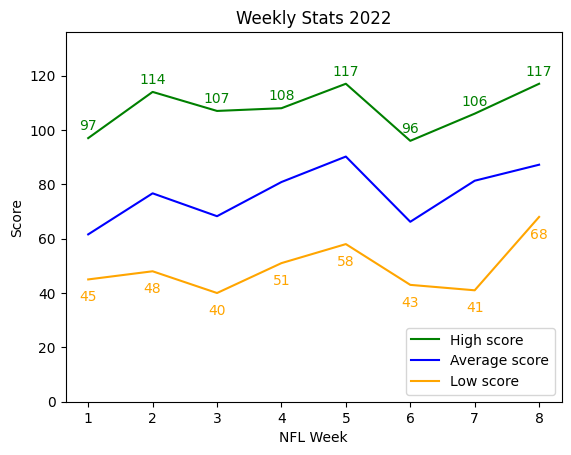

In [26]:
x = best_worst['Week'][best_worst['Week'] < 9]
high = best_worst['High Score'][best_worst['Week'] < 9]
avg = best_worst['Avg Score'][best_worst['Week'] < 9]
low = best_worst['Low Score'][best_worst['Week'] < 9]


plt.plot(x, high, label='High score', color='green')
plt.plot(x, avg, label='Average score', color='blue')
plt.plot(x, low, label='Low score', color='orange')


# Adding titles and labels
plt.title('Weekly Stats 2022')
plt.xlabel('NFL Week')
plt.ylabel('Score')
plt.ylim(0, 136)

# Adding a legend
plt.legend(loc='lower right')

#label y points
for i, v in enumerate(high):
    rounded_value = round(v)
    plt.text(x[i], v + 3, str(rounded_value), color='green', ha='center')

# Label each data point for the second series
for i, v in enumerate(low):
    rounded_value = round(v)
    plt.text(x[i], v - 8, str(rounded_value), color='orange', ha='center')

# Show the plot
plt.show()

In [6]:
season_totals['Rank Change'] = 0
season_totals[''] = " "

i = 0
while i < len(season_totals.index): 
    if season_totals['Rank Change Value'][i] < 0:
        season_totals.loc[season_totals.index[i], ''] = u'\u2191' #up arrow
        #season_totals.loc[season_totals.index[i], ''] = 'up' #up arrow
        season_totals.loc[season_totals.index[i], 'Rank Change'] = abs(season_totals['Rank Change Value'][i])
    elif season_totals['Rank Change Value'][i] == 0: 
        season_totals.loc[season_totals.index[i], ''] = "--"
        season_totals.loc[season_totals.index[i], 'Rank Change'] = 0
    else:
       season_totals.loc[season_totals.index[i], ''] = u'\u2193' #down arrow
       #season_totals.loc[season_totals.index[i], ''] = 'down' #down arrow
       season_totals.loc[season_totals.index[i], 'Rank Change'] = abs(season_totals['Rank Change Value'][i])
    i = i+ 1

In [12]:
tots = season_totals[['Score', 'Game Count', 'Week 18 Rank', 'Rank Change', '']].sort_values(['Week 18 Rank'])

tots.head()

,Score,Game Count,Week 18 Rank,Rank Change,
Player,,,,,
PBW,1611,175,1.0,1,↑
Lindsey,1610,170,2.0,1,↓
Zapp,1604,178,3.0,0,--
Ken,1577,162,4.0,0,--
Kathy Zwartz,1574,166,5.0,0,--


In [7]:
#upset count
upset_count1 = upset_counter(results['week1'])
upset_count2 = upset_counter(results['week2'])
upset_count3 = upset_counter(results['week3'])
upset_count4 = upset_counter(results['week4'])
upset_count5 = upset_counter(results['week5'])
upset_count6 = upset_counter(results['week6'])
upset_count7 = upset_counter(results['week7'])
upset_count8 = upset_counter(results['week8'])
upset_count9 = upset_counter(results['week9'])
upset_count10 = upset_counter(results['week10'])
upset_count11 = upset_counter(results['week11'])
upset_count12 = upset_counter(results['week12'])
upset_count13 = upset_counter(results['week13'])
upset_count14 = upset_counter(results['week14'])
upset_count15 = upset_counter(results['week15'])
upset_count16 = upset_counter(results['week16'])
upset_count17 = upset_counter(results['week17'])
upset_count18 = upset_counter(results['week18'])

Total of  6 upsets this week. With  1 being big dogs.
Total of  5 upsets this week. With  1 being big dogs.
Total of  9 upsets this week. With  1 being big dogs.
Total of  5 upsets this week. With  0 being big dogs.
Total of  4 upsets this week. With  2 being big dogs.
Total of  7 upsets this week. With  2 being big dogs.
Total of  7 upsets this week. With  2 being big dogs.
Total of  4 upsets this week. With  0 being big dogs.
Total of  4 upsets this week. With  1 being big dogs.
Total of  7 upsets this week. With  1 being big dogs.
Total of  3 upsets this week. With  0 being big dogs.
Total of  7 upsets this week. With  2 being big dogs.
Total of  4 upsets this week. With  0 being big dogs.
Total of  5 upsets this week. With  0 being big dogs.
Total of  5 upsets this week. With  0 being big dogs.
Total of  6 upsets this week. With  0 being big dogs.
Total of  4 upsets this week. With  0 being big dogs.
Total of  5 upsets this week. With  1 being big dogs.


In [8]:
hi = sorted(upset_count1[1])

In [9]:
max1 = week1_stats['Game Count'].nlargest(2)
min1 = week1_stats.min()
med1 = week6_stats['Game Count'].median()
max1

Player
Kathy Zwartz    13
Bob Z           11
Name: Game Count, dtype: int64

In [10]:
tots = {'Week': 1, 'Correct Pick Percentage': round(week1_stats['Pick Percentage'].mean(), 2), 'Avg Points per Win': points_per_win(week1_stats), 'Winner Pts': week1_stats['Score'].max(), 'Worst Player Pts': week1_stats['Score'].min(), 'Number of Upsets': upset_count1[0]}
weekly_stats = pd.DataFrame(tots, index=[0])
weekly_stats.loc[len(weekly_stats.index)] = [2, round(week2_stats['Pick Percentage'].mean(), 2), points_per_win(week2_stats), week2_stats['Score'].max(), week2_stats['Score'].min(), upset_count2[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [3, round(week3_stats['Pick Percentage'].mean(), 2), points_per_win(week3_stats), week3_stats['Score'].max(), week3_stats['Score'].min(), upset_count3[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [4, round(week4_stats['Pick Percentage'].mean(), 2), points_per_win(week4_stats), week4_stats['Score'].max(), week4_stats['Score'].min(), upset_count4[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [5, round(week5_stats['Pick Percentage'].mean(), 2), points_per_win(week5_stats), week5_stats['Score'].max(), week5_stats['Score'].min(), upset_count5[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [6, round(week6_stats['Pick Percentage'].mean(), 2), points_per_win(week6_stats), week6_stats['Score'].max(), week6_stats['Score'].min(), upset_count6[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [7, round(week7_stats['Pick Percentage'].mean(), 2), points_per_win(week7_stats), week7_stats['Score'].max(), week7_stats['Score'].min(), upset_count7[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [8, round(week8_stats['Pick Percentage'].mean(), 2), points_per_win(week8_stats), week8_stats['Score'].max(), week8_stats['Score'].min(), upset_count8[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [9, round(week9_stats['Pick Percentage'].mean(), 2), points_per_win(week9_stats), week9_stats['Score'].max(), week9_stats['Score'].min(), upset_count9[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [10, round(week10_stats['Pick Percentage'].mean(), 2), points_per_win(week10_stats), week10_stats['Score'].max(), week10_stats['Score'].min(), upset_count10[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [11, round(week11_stats['Pick Percentage'].mean(), 2), points_per_win(week11_stats), week11_stats['Score'].max(), week11_stats['Score'].min(), upset_count11[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [12, round(week12_stats['Pick Percentage'].mean(), 2), points_per_win(week12_stats), week12_stats['Score'].max(), week12_stats['Score'].min(), upset_count12[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [13, round(week13_stats['Pick Percentage'].mean(), 2), points_per_win(week13_stats), week13_stats['Score'].max(), week13_stats['Score'].min(), upset_count13[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [14, round(week14_stats['Pick Percentage'].mean(), 2), points_per_win(week14_stats), week14_stats['Score'].max(), week14_stats['Score'].min(), upset_count14[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [15, round(week15_stats['Pick Percentage'].mean(), 2), points_per_win(week15_stats), week15_stats['Score'].max(), week15_stats['Score'].min(), upset_count15[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [16, round(week16_stats['Pick Percentage'].mean(), 2), points_per_win(week16_stats), week16_stats['Score'].max(), week16_stats['Score'].min(), upset_count16[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [17, round(week17_stats['Pick Percentage'].mean(), 2), points_per_win(week17_stats), week17_stats['Score'].max(), week17_stats['Score'].min(), upset_count17[0]] 
weekly_stats.loc[len(weekly_stats.index)] = [18, round(week18_stats['Pick Percentage'].mean(), 2), points_per_win(week18_stats), week18_stats['Score'].max(), week18_stats['Score'].min(), upset_count18[0]] 




Text(0.5, 0, 'Week')

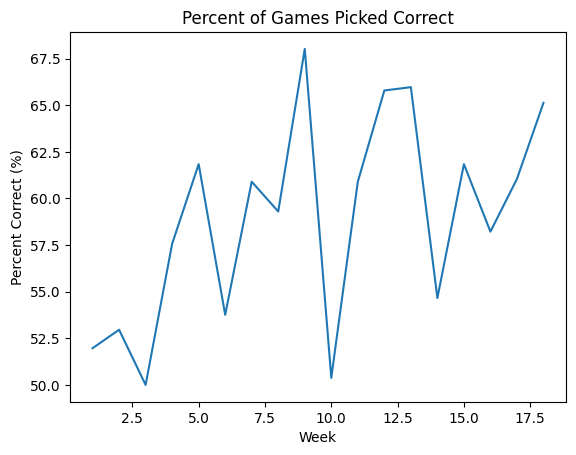

In [11]:
plt.plot(weekly_stats['Week'], weekly_stats['Correct Pick Percentage'])
plt.title('Percent of Games Picked Correct')
plt.ylabel('Percent Correct (%)')
#plt.ylim([25, 75])
plt.xlabel("Week")

In [13]:
#create weely totals df to track totals each week
weekly_totals = pd.concat([week1_stats.rename(columns={"Score": "Week 1 Score", "Game Count": "Week 1 Game Count"}),
 week2_stats.rename(columns={"Score": "Week 2 Score", "Game Count": "Week 2 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week3_stats.rename(columns={"Score": "Week 3 Score", "Game Count": "Week 3 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week4_stats.rename(columns={"Score": "Week 4 Score", "Game Count": "Week 4 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week5_stats.rename(columns={"Score": "Week 5 Score", "Game Count": "Week 5 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week6_stats.rename(columns={"Score": "Week 6 Score", "Game Count": "Week 6 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week7_stats.rename(columns={"Score": "Week 7 Score", "Game Count": "Week 7 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week8_stats.rename(columns={"Score": "Week 8 Score", "Game Count": "Week 8 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week9_stats.rename(columns={"Score": "Week 9 Score", "Game Count": "Week 9 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week10_stats.rename(columns={"Score": "Week 10 Score", "Game Count": "Week 10 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week11_stats.rename(columns={"Score": "Week 11 Score", "Game Count": "Week 11 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week12_stats.rename(columns={"Score": "Week 12 Score", "Game Count": "Week 12 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week13_stats.rename(columns={"Score": "Week 13 Score", "Game Count": "Week 13 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week14_stats.rename(columns={"Score": "Week 14 Score", "Game Count": "Week 14 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week15_stats.rename(columns={"Score": "Week 15 Score", "Game Count": "Week 15 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week16_stats.rename(columns={"Score": "Week 16 Score", "Game Count": "Week 16 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week17_stats.rename(columns={"Score": "Week 17 Score", "Game Count": "Week 17 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week18_stats.rename(columns={"Score": "Week 18 Score", "Game Count": "Week 18 Game Count"})], axis=1)

weekly_totals.head(18)



,Week 1 Score,Week 1 Game Count,Max Score,Pick Percentage,Points per win,Week 2 Score,Week 2 Game Count,Max Score,Pick Percentage,Points per win,...,Week 17 Score,Week 17 Game Count,Max Score,Pick Percentage,Points per win,Week 18 Score,Week 18 Game Count,Max Score,Pick Percentage,Points per win
Player,,,,,,,,,,,,,,,,,,,,,
abfarias,52,7,52,43.75,7.43,74,7,74,43.75,10.57,...,87,9,87,60.00,9.67,79,9,79,56.25,8.78
Bob Z,72,11,72,68.75,6.55,86,10,86,62.50,8.60,...,87,9,87,60.00,9.67,106,11,106,68.75,9.64
Ellieisawesome1,61,8,61,50.00,7.62,114,14,114,87.50,8.14,...,96,10,96,66.67,9.60,103,11,103,68.75,9.36
JJapcon,60,8,60,50.00,7.50,81,9,81,56.25,9.00,...,100,10,100,66.67,10.00,10,10,130,62.50,1.00
Kathy Zwartz,97,13,97,81.25,7.46,79,9,79,56.25,8.78,...,79,7,79,46.67,11.29,117,13,117,81.25,9.00
Ken,67,9,67,56.25,7.44,79,8,79,50.00,9.88,...,94,10,94,66.67,9.40,98,10,98,62.50,9.80
Lindsey,53,8,53,50.00,6.62,71,9,71,56.25,7.89,...,101,9,101,60.00,11.22,91,9,91,56.25,10.11
Lizzy_Z,45,7,45,43.75,6.43,73,8,73,50.00,9.12,...,57,7,57,46.67,8.14,88,9,88,56.25,9.78
Matt McKenna,56,8,56,50.00,7.00,64,6,64,37.50,10.67,...,65,7,65,46.67,9.29,115,12,115,75.00,9.58


In [14]:
#find individual weekly statistics: avg pick percent, median, std
player_totals = pd.DataFrame()
for player, row in weekly_totals.iterrows(): 
    player_totals = player_totals.append(weekly_totals.loc[player]['Pick Percentage'].describe().apply("{0:.2f}".format))



C:\Users\mtzwa\AppData\Local\Temp\ipykernel_10032\66817774.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  player_totals = player_totals.append(weekly_totals.loc[player]['Pick Percentage'].describe().apply("{0:.2f}".format))
C:\Users\mtzwa\AppData\Local\Temp\ipykernel_10032\66817774.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  player_totals = player_totals.append(weekly_totals.loc[player]['Pick Percentage'].describe().apply("{0:.2f}".format))
C:\Users\mtzwa\AppData\Local\Temp\ipykernel_10032\66817774.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  player_totals = player_totals.append(weekly_totals.loc[player]['Pick Percentage'].describe().apply("{0:.2f}".format))
C:\Users\mtzwa\AppData\Local\Temp\ipykernel_10

In [15]:
player_totals[['mean', 'std', 'min', 'max']].sort_values(['mean'], ascending = False)

,mean,std,min,max
Zapp,65.61,9.41,43.75,81.25
PBW,64.89,10.25,43.75,84.62
Bob Z,63.16,11.97,35.71,86.67
Lindsey,62.60,10.09,42.86,81.25
Kathy Zwartz,61.46,12.68,46.67,92.31
Ellieisawesome1,61.27,12.82,37.50,87.50
Ken,59.82,10.80,42.86,81.25
Shaner,59.58,10.62,42.86,84.62
Wild Bill,59.57,10.60,31.25,78.57
MattWojtanek,58.83,14.33,30.77,93.33
